<a href="https://colab.research.google.com/github/lindseyrose54/Odin-landing-page/blob/main/MINI_PROJECT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# **************************************** HOTEL BOOKINGS AND ECONOMIC INDICATORS  ******************************

In [ ]:
# My goal with data set is to see if I can predict cancelation rate for a hotel based off economic indicators
# I would also like to see if there are any relationships between specific economic indicators and booking demand

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
df_hotel = pd.read_csv('/content/archive (5).zip')
df_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,INFLATION,INFLATION_CHG,CSMR_SENT,UNRATE,INTRSRT,GDP,FUEL_PRCS,CPI_HOTELS,US_GINI,DIS_INC
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,1.8,0.0,93.1,5.3,0.75,18306.960,194.0,0.187566,41.2,41355.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,1.7,0.0,95.1,4.4,1.75,19561.896,204.2,0.151972,41.2,42834.0


In [ ]:
df_hotel.shape

(119390, 43)

In [ ]:
df_hotel.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df_hotel['CPI_AVG'].fillna(df_hotel['CPI_AVG'].mean(), inplace=True)
df_hotel['INFLATION'].fillna(df_hotel['INFLATION'].mean(), inplace=True)
df_hotel['INFLATION_CHG'].fillna(df_hotel['INFLATION_CHG'].mean(), inplace=True)
df_hotel['CSMR_SENT'].fillna(df_hotel['CSMR_SENT'].mean(), inplace=True)
df_hotel['UNRATE'].fillna(df_hotel['UNRATE'].mean(), inplace=True)
df_hotel['INTRSRT'].fillna(df_hotel['INTRSRT'].mean(), inplace=True)
df_hotel['GDP'].fillna(df_hotel['GDP'].mean(), inplace=True)
df_hotel['FUEL_PRCS'].fillna(df_hotel['FUEL_PRCS'].mean(), inplace=True)
df_hotel['CPI_HOTELS'].fillna(df_hotel['CPI_HOTELS'].mean(), inplace=True)
df_hotel['US_GINI'].fillna(df_hotel['US_GINI'].mean(), inplace=True)
df_hotel['DIS_INC'].fillna(df_hotel['DIS_INC'].mean(), inplace=True)

# I will be trying to convert this into a for loop in the future as it would be a cleaner more efficient code

<ipython-input-7-c984bcc235a6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hotel['CPI_AVG'].fillna(df_hotel['CPI_AVG'].mean(), inplace=True)
<ipython-input-7-c984bcc235a6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
df_hotel.isna().sum()     # double checking my work. I am not going to be using Country or agent in my models.

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df_hotel.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [ ]:
df_hotel['hotel_encoded']= df_hotel['hotel'].map({'Resort Hotel': 1, 'City Hotel': 0})

In [ ]:
df_hotel['hotel_encoded']

,hotel_encoded
0,1
1,1
2,1
3,1
4,1
...,...
119385,0
119386,0
119387,0
119388,0


In [ ]:
df_hotel['arrival_date_month_encoded']= df_hotel['arrival_date_month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})

In [ ]:
df_hotel['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
df_hotel['deposit_type_encoded'] = df_hotel['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2})

In [ ]:
df_hotel['customer_type_encoded']= df_hotel['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

In [ ]:
df_hotel['reservation_status_encoded'] = df_hotel['reservation_status'].map({'Check-Out': 0, 'Canceled': 1, 'No-Show': 2})

In [ ]:
df_hotel.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


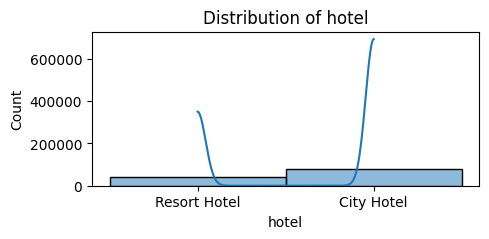

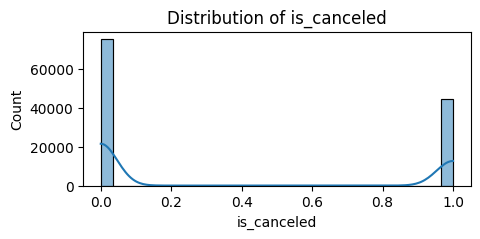

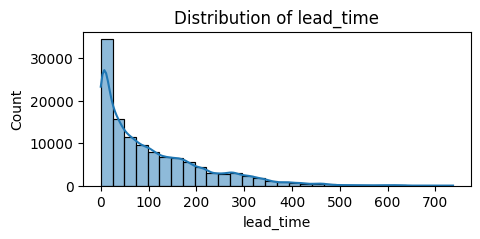

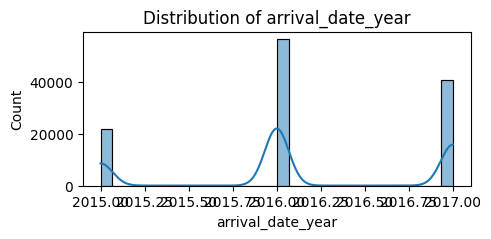

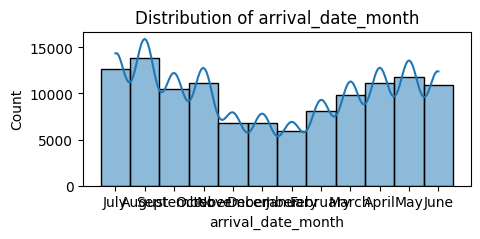

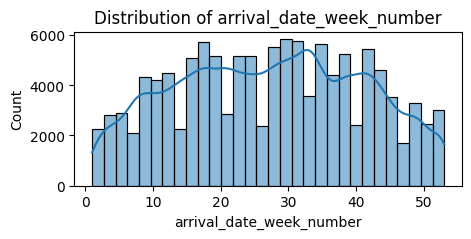

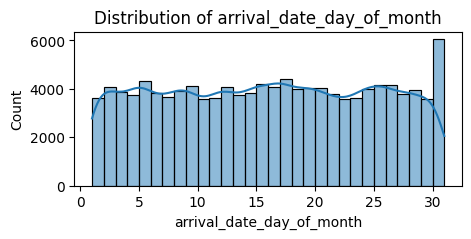

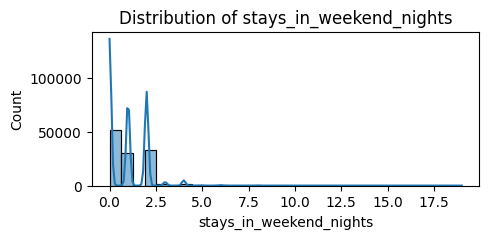

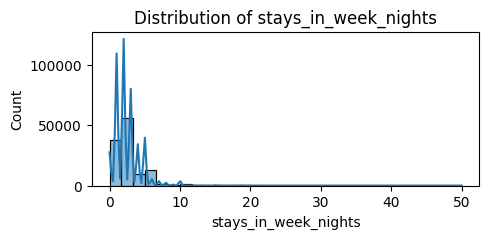

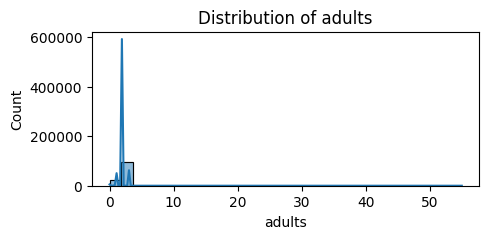

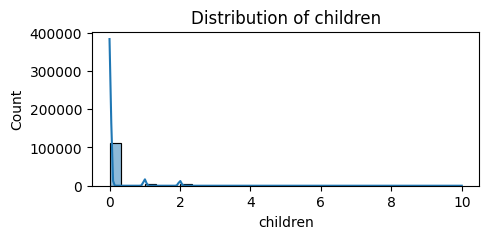

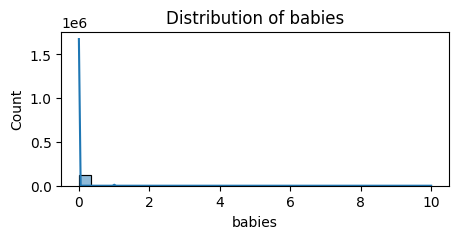

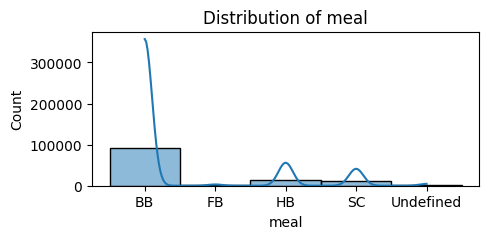

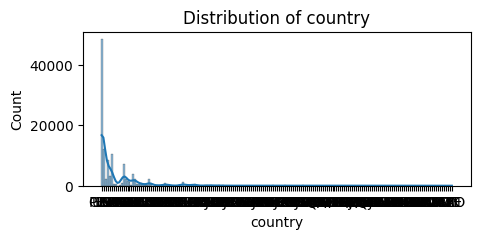

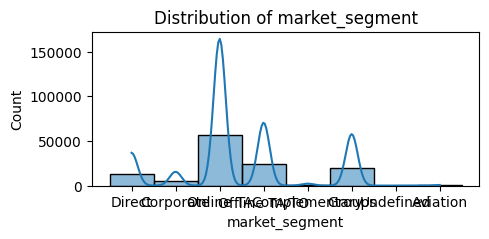

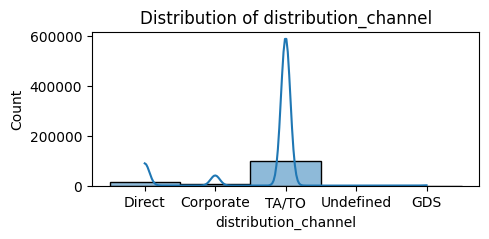

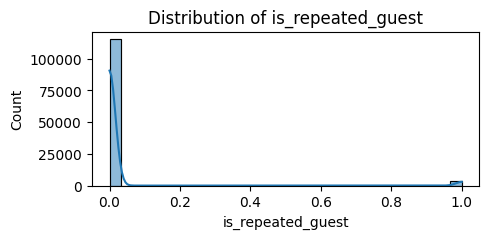

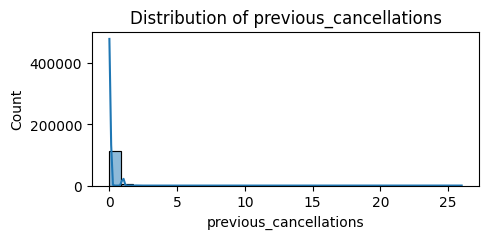

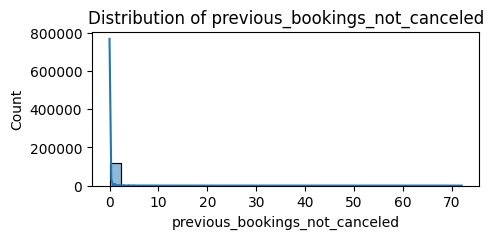

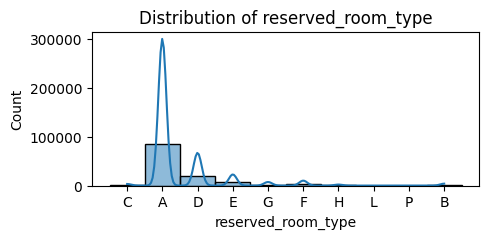

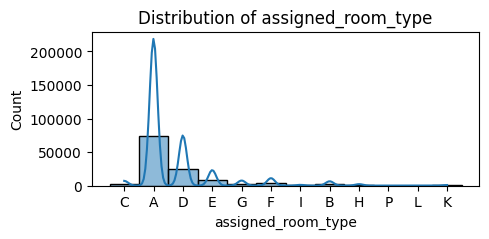

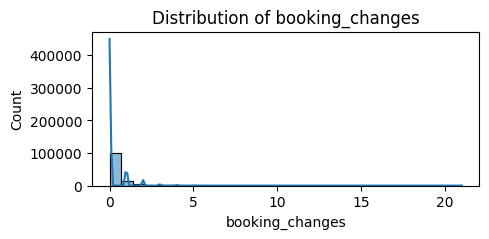

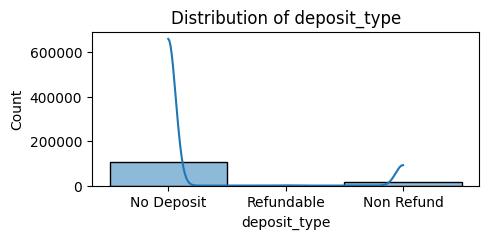

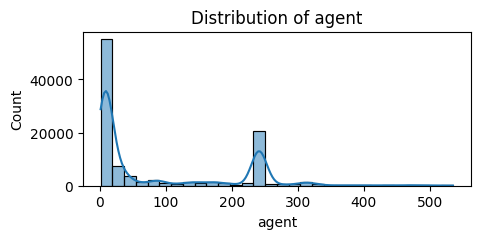

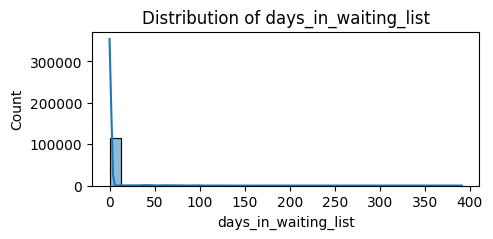

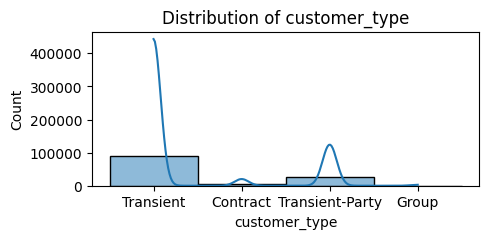

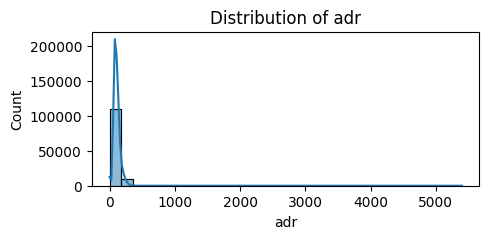

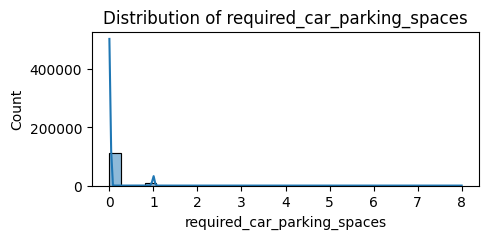

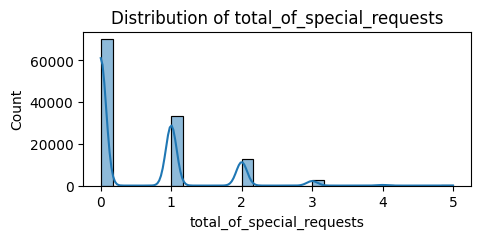

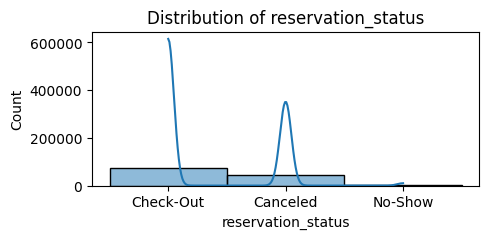

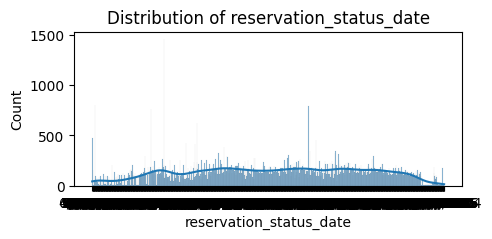

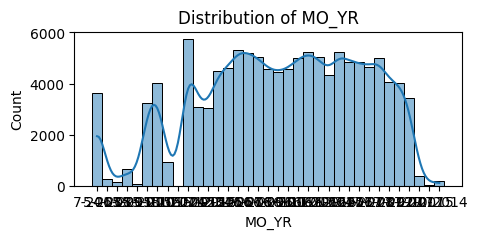

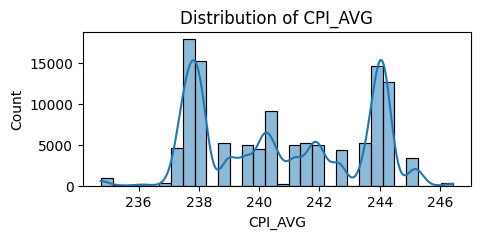

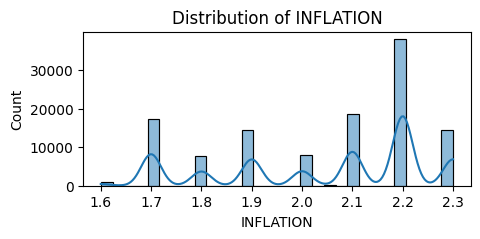

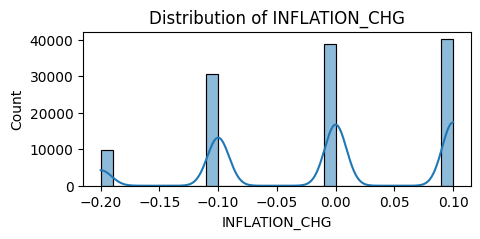

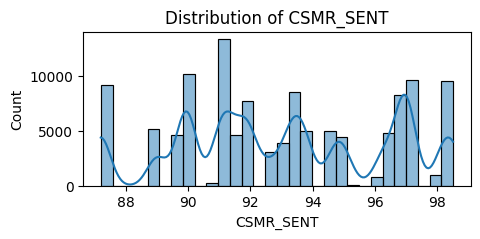

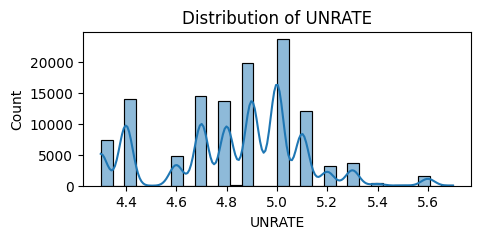

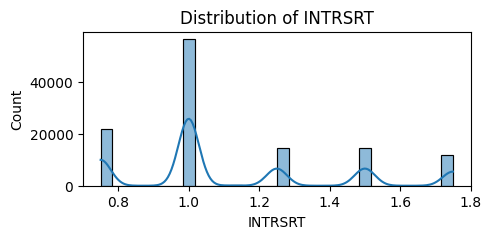

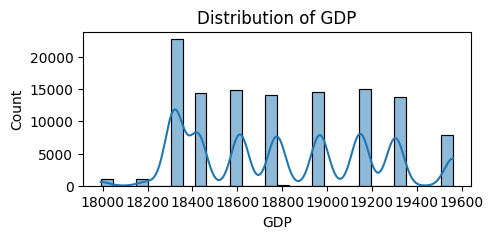

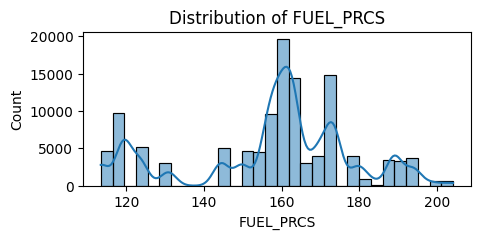

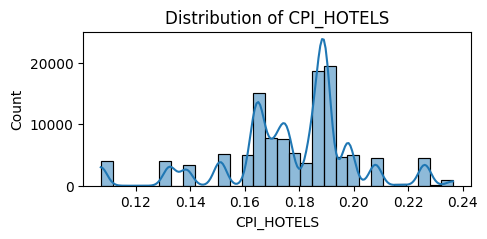

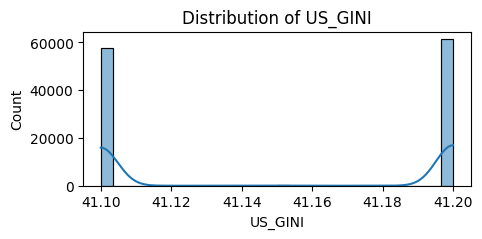

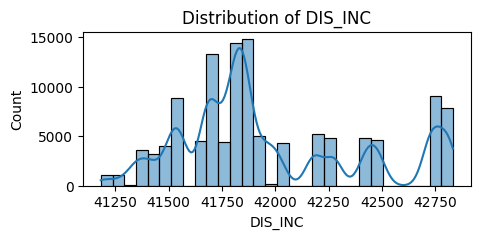

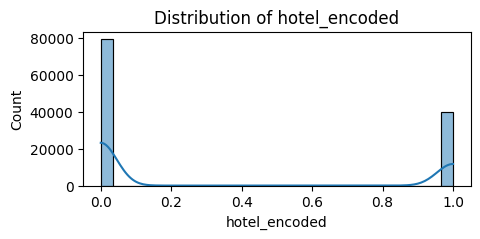

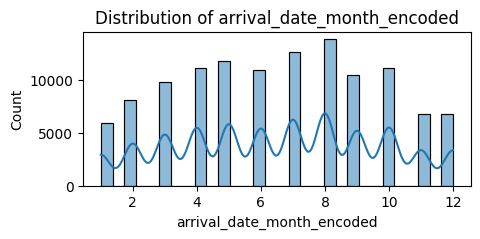

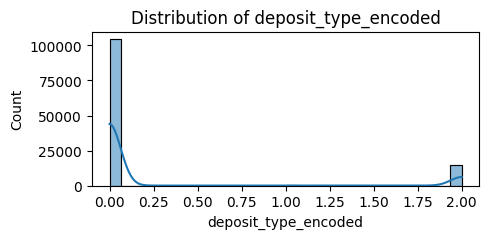

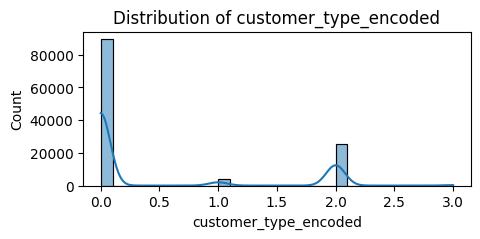

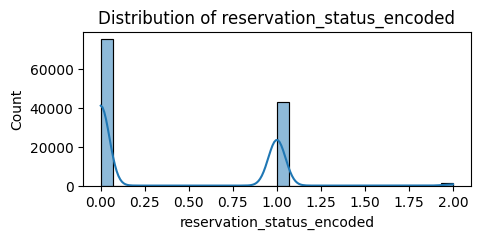

In [ ]:
cols = df_hotel.columns
for col in cols:
    plt.figure(figsize=(5, 2))
    sns.histplot(df_hotel[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
booking_by_month = df_hotel.groupby(['arrival_date_month', 'hotel']).size()
booking_by_month    # grouping booking of a city vs resort hotel by month

arrival_date_month  hotel       
April               City Hotel      7480
                    Resort Hotel    3609
August              City Hotel      8983
                    Resort Hotel    4894
December            City Hotel      4132
                    Resort Hotel    2648
February            City Hotel      4965
                    Resort Hotel    3103
January             City Hotel      3736
                    Resort Hotel    2193
July                City Hotel      8088
                    Resort Hotel    4573
June                City Hotel      7894
                    Resort Hotel    3045
March               City Hotel      6458
                    Resort Hotel    3336
May                 City Hotel      8232
                    Resort Hotel    3559
November            City Hotel      4357
                    Resort Hotel    2437
October             City Hotel      7605
                    Resort Hotel    3555
September           City Hotel      7400
                    Resort Hotel    3108
dtype: int64

In [ ]:
booking_cancellations_by_month = df_hotel.groupby(['arrival_date_month', 'is_canceled']).size()
booking_cancellations_by_month

arrival_date_month  is_canceled
April               0              6565
                    1              4524
August              0              8638
                    1              5239
December            0              4409
                    1              2371
February            0              5372
                    1              2696
January             0              4122
                    1              1807
July                0              7919
                    1              4742
June                0              6404
                    1              4535
March               0              6645
                    1              3149
May                 0              7114
                    1              4677
November            0              4672
                    1              2122
October             0              6914
                    1              4246
September           0              6392
                    1              4116
dtype: int64

<ipython-input-21-6015a62fb564>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_cancellations = df_hotel[df_hotel['is_canceled'] == 1].groupby(['arrival_date_month', 'hotel']).size().reset_index(name='count')


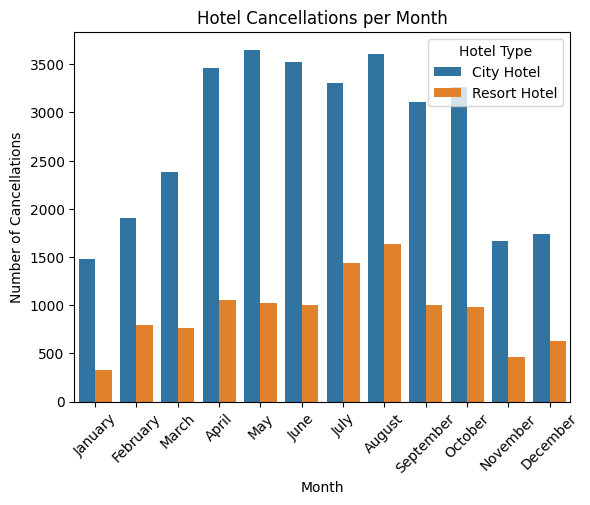

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_hotel['arrival_date_month'] = pd.Categorical(df_hotel['arrival_date_month'], categories= month_order, ordered=True)

monthly_cancellations = df_hotel[df_hotel['is_canceled'] == 1].groupby(['arrival_date_month', 'hotel']).size().reset_index(name='count')

plt.figure()
sns.barplot(x='arrival_date_month', y='count',hue= 'hotel', data= monthly_cancellations)

plt.xlabel("Month")
plt.ylabel("Number of Cancellations")
plt.title("Hotel Cancellations per Month")
plt.xticks(rotation=45)
plt.legend(title="Hotel Type")

plt.show()

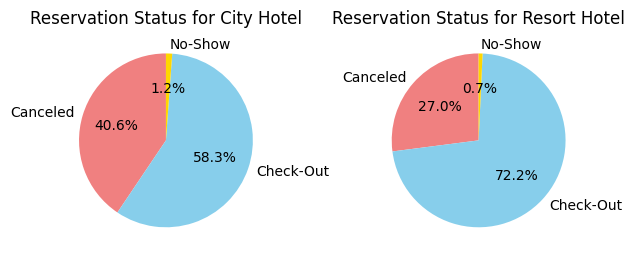

In [ ]:
reservation_counts = df_hotel.groupby('hotel')['reservation_status'].value_counts().unstack()

fig, axes = plt.subplots(1, 2)

for i, hotel in enumerate(reservation_counts.index):
    axes[i].pie(reservation_counts.loc[hotel], labels=reservation_counts.columns, autopct='%1.1f%%',
                startangle=90, colors=["lightcoral", "skyblue", "gold"])
    axes[i].set_title(f"Reservation Status for {hotel}")

plt.tight_layout()
plt.show()                               # It seems we are showing a much higher cancellation rate for City Hotels vs Resort Hotels
                                         # We are also seeing a higher 'stay' percentage for Resort Hotel vs City hotel

Text(0, 0.5, 'Number of days prior to arrival')

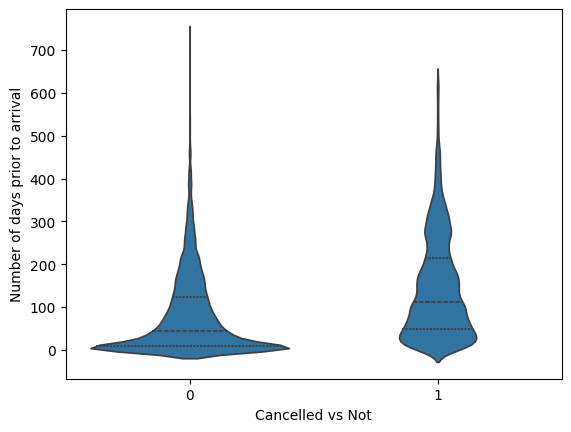

In [ ]:
sns.violinplot(x=df_hotel['is_canceled'], y=df_hotel['lead_time'],inner="quartile")
plt.xlabel("Cancelled vs Not")
plt.ylabel("Number of days prior to arrival")

In [ ]:
# *********************************** MODELS ****************************************

In [ ]:
# I am going to create a new df that is only going to include the features I will be using

In [ ]:
df_hotel.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,category
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [ ]:
df = df_hotel[['is_canceled', 'lead_time', 'arrival_date_month_encoded','GDP', 'INTRSRT', 'INFLATION_CHG', 'INFLATION', 'CPI_AVG', 'CPI_HOTELS', 'FUEL_PRCS', 'UNRATE', 'DIS_INC','CSMR_SENT', ]]
df

,is_canceled,lead_time,arrival_date_month_encoded,GDP,INTRSRT,INFLATION_CHG,INFLATION,CPI_AVG,CPI_HOTELS,FUEL_PRCS,UNRATE,DIS_INC,CSMR_SENT
0,0,342,7,18306.960,0.75,0.0,1.8,238.034,0.187566,194.0,5.3,41355.0,93.1
1,0,737,7,18306.960,0.75,0.0,1.8,238.034,0.187566,194.0,5.3,41355.0,93.1
2,0,7,7,18306.960,0.75,0.0,1.8,238.034,0.187566,194.0,5.3,41355.0,93.1
3,0,13,7,18306.960,0.75,0.0,1.8,238.034,0.187566,194.0,5.3,41355.0,93.1
4,0,14,7,18306.960,0.75,0.0,1.8,238.034,0.187566,194.0,5.3,41355.0,93.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,8,19561.896,1.75,0.0,1.7,246.435,0.151972,204.2,4.4,42834.0,95.1
119386,0,102,8,19561.896,1.75,0.0,1.7,246.435,0.151972,204.2,4.4,42834.0,95.1
119387,0,34,8,19561.896,1.75,0.0,1.7,246.435,0.151972,204.2,4.4,42834.0,95.1
119388,0,109,8,19561.896,1.75,0.0,1.7,246.435,0.151972,204.2,4.4,42834.0,95.1


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_month_encoded,GDP,INTRSRT,INFLATION_CHG,INFLATION,CPI_AVG,CPI_HOTELS,FUEL_PRCS,UNRATE,DIS_INC,CSMR_SENT
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,6.552483,18796.312904,1.120033,-0.008392,2.043988,240.780652,0.177324,157.648724,4.827968,41970.477321,93.093092
std,0.482918,106.863097,3.090619,400.704600,0.301696,0.095627,0.203234,2.689790,0.023966,21.357724,0.278893,426.416278,3.269880
min,0.000000,0.000000,1.000000,17991.348000,0.750000,-0.200000,1.600000,234.747000,0.107059,113.400000,4.300000,41182.000000,87.200000
25%,0.000000,18.000000,4.000000,18425.306000,1.000000,-0.100000,1.900000,238.033000,0.165677,149.800000,4.700000,41680.000000,91.000000
50%,0.000000,69.000000,7.000000,18775.459000,1.000000,0.000000,2.100000,240.545000,0.183547,161.100000,4.900000,41850.000000,93.100000
75%,1.000000,160.000000,9.000000,19148.194000,1.250000,0.100000,2.200000,243.892000,0.189821,171.500000,5.000000,42274.000000,96.300000
max,1.000000,737.000000,12.000000,19561.896000,1.750000,0.100000,2.300000,246.435000,0.236504,204.200000,5.700000,42834.000000,98.500000


In [ ]:
corr_matrix=df.corr()
corr_matrix

,is_canceled,lead_time,arrival_date_month_encoded,GDP,INTRSRT,INFLATION_CHG,INFLATION,CPI_AVG,CPI_HOTELS,FUEL_PRCS,UNRATE,DIS_INC,CSMR_SENT
is_canceled,1.000000,0.293123,0.011022,-0.152780,-0.139060,0.072661,0.060954,-0.137572,0.109535,-0.040514,0.168600,-0.145719,0.037948
lead_time,0.293123,1.000000,0.131424,-0.038093,-0.031556,0.000432,-0.140307,-0.051620,0.042027,0.139889,0.065761,-0.047272,-0.040118
arrival_date_month_encoded,0.011022,0.131424,1.000000,-0.168466,-0.271271,0.173259,-0.184775,-0.159538,0.093521,0.326295,0.247410,-0.266115,-0.312181
GDP,-0.152780,-0.038093,-0.168466,1.000000,0.912037,-0.396122,-0.255655,0.977109,-0.714010,0.320393,-0.884728,0.932402,0.555462
INTRSRT,-0.139060,-0.031556,-0.271271,0.912037,1.000000,-0.345659,-0.367034,0.866243,-0.767101,0.205103,-0.919194,0.972529,0.617040
INFLATION_CHG,0.072661,0.000432,0.173259,-0.396122,-0.345659,1.000000,0.274627,-0.421883,0.277402,-0.131906,0.340600,-0.416288,-0.077235
INFLATION,0.060954,-0.140307,-0.184775,-0.255655,-0.367034,0.274627,1.000000,-0.214294,0.520645,-0.691734,0.254082,-0.359325,-0.165382
CPI_AVG,-0.137572,-0.051620,-0.159538,0.977109,0.866243,-0.421883,-0.214294,1.000000,-0.663427,0.380956,-0.839731,0.884376,0.621258
CPI_HOTELS,0.109535,0.042027,0.093521,-0.714010,-0.767101,0.277402,0.520645,-0.663427,1.000000,-0.332471,0.654271,-0.774689,-0.398746
FUEL_PRCS,-0.040514,0.139889,0.326295,0.320393,0.205103,-0.131906,-0.691734,0.380956,-0.332471,1.000000,-0.153589,0.205398,0.272261


<Axes: >

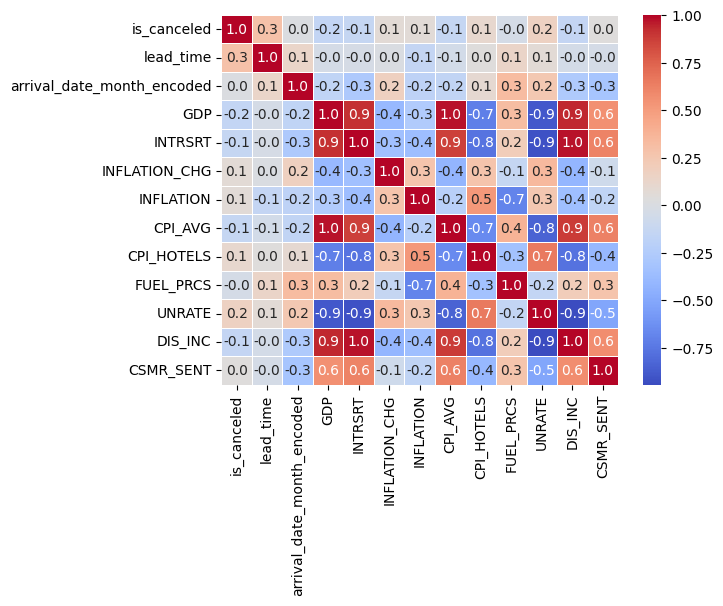

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', cbar=True, linewidths=0.5)

In [ ]:
X = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)          # I decided to scale this data due to the GDP col being so different from some of the other col.

In [ ]:
base_models = [
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('logreg', LogisticRegression())
]

In [ ]:
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

In [ ]:
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('logreg', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [ ]:
y_train_pred = stacking_model.predict(X_train)
y_train_pred_proba = stacking_model.predict_proba(X_train)[:, 1]

In [ ]:
train_acc = accuracy_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, y_train_pred_proba)

print('Train accuracy:', train_acc)
print('Train auc:', train_auc)

Train accuracy: 0.925381103945054
Train auc: 0.9592212252403907


In [ ]:
y_pred = stacking_model.predict(X_test)
y_prob = stacking_model.predict_proba(X_test)[:, 1]  # For AUC-ROC

accuracy = accuracy_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Test Accuracy: 0.9218
AUC-ROC: 0.9423


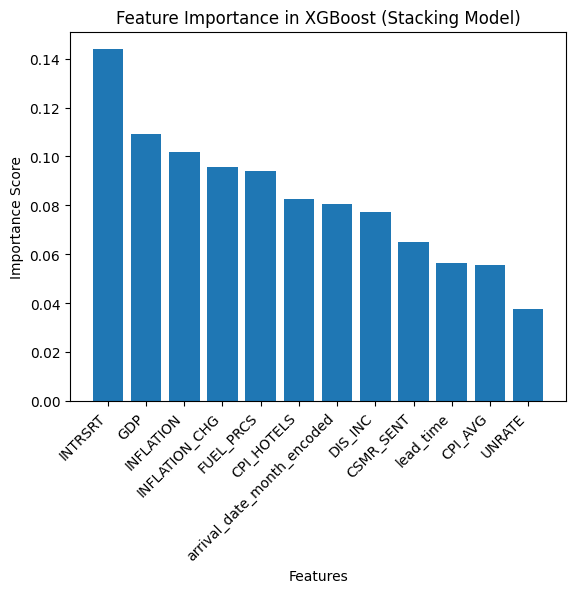

In [ ]:
#feature importances from XGBoost
xgb_model = stacking_model.named_estimators_['xgb']  # Extract trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
feature_names = X.columns

plt.figure()
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=45, ha="right")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance in XGBoost (Stacking Model)")
plt.show()

# This is showing that our top features that are influencing cancellation rates are Interest Rates, GDP, and Inflation inour XGB model

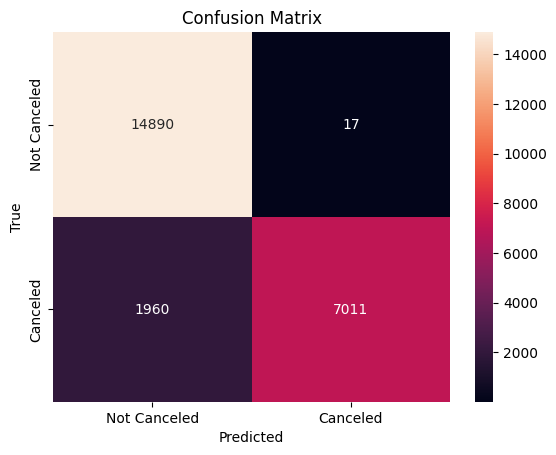

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

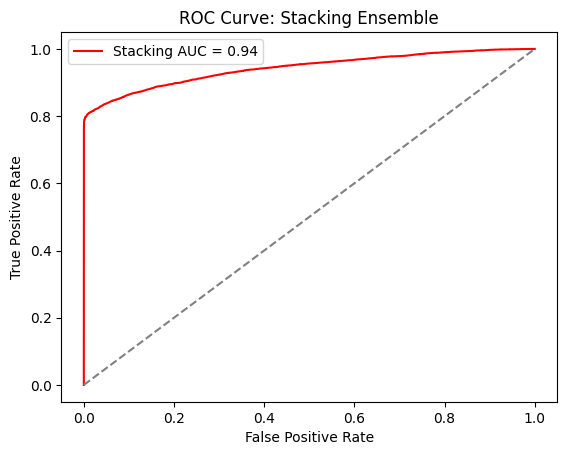

In [ ]:
y_pred_prob_stack = stacking_model.predict_proba(X_test)[:, 1]

# Computing CURVE
fpr_stack, tpr_stack, _ = roc_curve(y_test, y_pred_prob_stack)
roc_auc_stack = auc(fpr_stack, tpr_stack)

plt.figure()
plt.plot(fpr_stack, tpr_stack, color='red', label=f'Stacking AUC = {roc_auc_stack:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Stacking Ensemble')
plt.legend()
plt.show()

In [ ]:
# I am also going to try and utilize LTSM model to compare to my stack ensemble

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [ ]:
N_LAGS = 3      # I am going to attempt to add a time-series element since we are trying to predict booking and economic triggers over time

In [ ]:
economic_features = ['GDP', 'INTRSRT', 'INFLATION_CHG', 'INFLATION', 'CPI_AVG', 'CPI_HOTELS', 'FUEL_PRCS', 'UNRATE', 'DIS_INC','CSMR_SENT']

In [ ]:
for col in economic_features:
    for lag in range(1, N_LAGS + 1):
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

<ipython-input-43-3b77a61dd970>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_lag{lag}'] = df[col].shift(lag)
<ipython-input-43-3b77a61dd970>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{col}_lag{lag}'] = df[col].shift(lag)
<ipython-input-43-3b77a61dd970>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
X_reshaped = X_scaled.reshape((X_scaled.shape[0], N_LAGS, X_scaled.shape[1] // N_LAGS))

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train2.shape[1], X_train2.shape[2])),
    Dropout(0.2),
    LSTM(25, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train2, y_train2, epochs=50, batch_size=32, validation_data=(X_test2, y_test2), verbose=1)

Epoch 1/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.7246 - loss: 0.5495 - val_accuracy: 0.8731 - val_loss: 0.3423
Epoch 2/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8692 - loss: 0.3446 - val_accuracy: 0.9095 - val_loss: 0.2700
Epoch 3/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8987 - loss: 0.2919 - val_accuracy: 0.9003 - val_loss: 0.2705
Epoch 4/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9105 - loss: 0.2676 - val_accuracy: 0.9128 - val_loss: 0.2578
Epoch 5/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9123 - loss: 0.2633 - val_accuracy: 0.9149 - val_loss: 0.2536
Epoch 6/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9128 - loss: 0.2589 - val_accuracy: 0.9156 - val_loss: 0.2483
Epoch 7/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9135 - loss: 0.2558 - val_accuracy: 0.9159 - val_loss: 0.2476
Epoch 8/50
2985/2985 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9149 - loss: 0

In [ ]:
loss, accuracy = model.evaluate(X_test2, y_test2)
print(f"LSTM Model Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_prob = model.predict(X_test2)
y_pred = (y_pred_prob > 0.5).astype(int)

747/747 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9176 - loss: 0.2377
LSTM Model Accuracy: 0.9172
747/747 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
auc_lstm = roc_auc_score(y_test2, y_pred_prob)
print(f"LSTM ROC-AUC Score: {auc_lstm:.4f}")

LSTM ROC-AUC Score: 0.9300


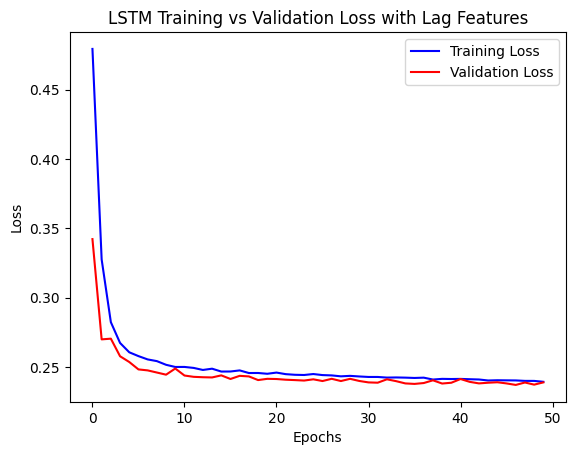

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training vs Validation Loss with Lag Features')
plt.legend()
plt.show()

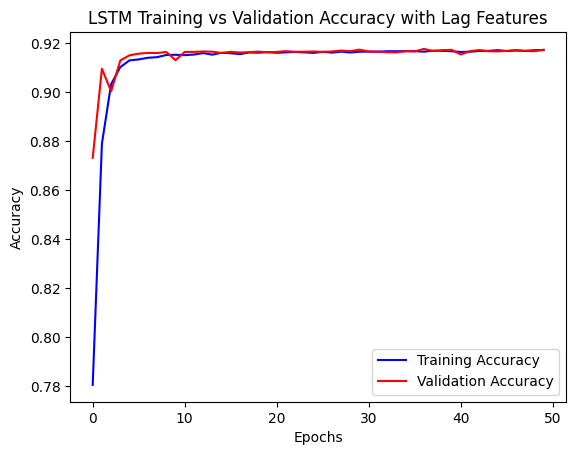

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Training vs Validation Accuracy with Lag Features')
plt.legend()
plt.show()

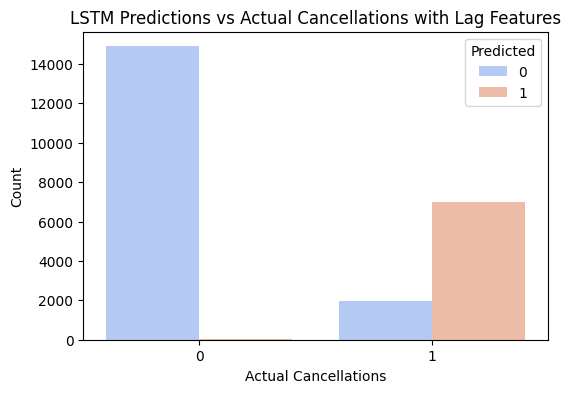

In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred.flatten()})

# Count actual vs predicted cancellations
plt.figure(figsize=(6, 4))
sns.countplot(x='Actual', hue='Predicted', data=comparison_df, palette='coolwarm')
plt.xlabel('Actual Cancellations')
plt.ylabel('Count')
plt.title('LSTM Predictions vs Actual Cancellations with Lag Features')
plt.legend(title="Predicted")
plt.show()